# Predicting Heart Disesase using Machine Learning

## Steps to be followed
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
Build a Machine Learning model that can predict whether if a patient has heart disease on the basis of some given parameters

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

UsageError: Line magic function `%` not found.


## Load Data

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.shape

In [ ]:
# Let's find out how many of each class is there
df["target"].value_counts()

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
df.info()

In [ ]:
## Are there any missing values?
df.isna().sum()

In [ ]:
df.describe()

## Heart disease according to the gender attribute

In [ ]:
df.sex.value_counts()

In [ ]:
#compare target columns with sex columns
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency by for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);


In [ ]:
df['thalach'].value_counts()

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon"
            )

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="lightblue")

# Add some helpful info
plt.title(" heart Diesease in function of age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend("disease", "no disease")


In [ ]:
df.age[df.target == 1]

In [ ]:
#Check the distribution fo the age column with a histogram
df.age.plot.hist();

## Heart Disease Freq per chest pain type

In [ ]:
pd.crosstab(df.cp, df.target)

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

In [ ]:
# Make a correlation matrix
df.corr()

In [ ]:
#Lets make out correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="magma")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modelling

In [ ]:
#Split the data into X and Y
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
X

In [ ]:
y

In [ ]:
#Split the data into train and test
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
#puts models in a a dictionary
models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier,
          }


#create a function to fit and score models
def fit_and_score(models, X_test, X_train, y_train, y_test):
    '''
    fits and evaluates given mML models
     models: a dictionary of diffrent scikit learn ML models
     X_test: testing data (no labels)
    X_train:training data (no labels)
    y_train: training labels
    y_test: testing labels
    :return:
    '''


# Set random seeds
np.random.seed(42)

#Make a dictionary to keep the model scores
model_scores = {}

#Loop through models

for name, model in models.items():
    #Fit the model to the data
    model.fit(X_train, y_train)
    #Evaluating the model and append its score to the model_scores
    model_scores[name] = model.score(X_test, y_test)
return model_scores

## Model comparison

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning

Maximum KNN score on the test data: 75.41%


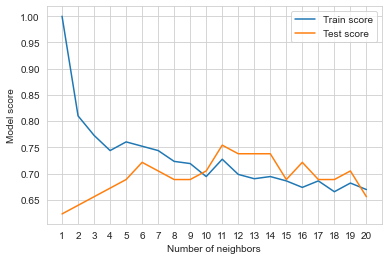

In [62]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with Randomized search CV

In [63]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

rs_log_reg.best_params_
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

## Hyperparameter tuning with RandomizedSearchCV

In [65]:
## We're going to tune: RandomForestClassifier()
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

# Find the best hyperparameters
rs_rf.best_params_

# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934